<a href="https://colab.research.google.com/github/u1353279/DEEP-LEARNING/blob/master/Mobilenetv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**My First Mobilenet model for classifying cats-vs-dogs**

In [32]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
mobile = keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [3]:
train_path='/content/drive/My Drive/Colab Notebooks/dogs-vs-cats (1)/train'
valid_path='/content/drive/My Drive/Colab Notebooks/dogs-vs-cats (1)/valid'
test_path='/content/drive/My Drive/Colab Notebooks/dogs-vs-cats (1)/test'

In [9]:
train_batch=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=train_path,target_size=(224,224),batch_size=10)

valid_batch=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=10)

test_batch=ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:
x=mobile.layers[-6].output
predictions=Dense(2,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=predictions)

In [12]:
for layer in model.layers[:-5]:
  layer.trainable=False

In [13]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit_generator(train_batch,steps_per_epoch=4,validation_data=valid_batch,validation_steps=2,epochs=30,verbose=2)

Epoch 1/30
 - 19s - loss: 1.5146 - accuracy: 0.4250 - val_loss: 0.5682 - val_accuracy: 0.5500
Epoch 2/30
 - 16s - loss: 1.1333 - accuracy: 0.4750 - val_loss: 0.1696 - val_accuracy: 0.8000
Epoch 3/30
 - 17s - loss: 0.7511 - accuracy: 0.5750 - val_loss: 0.4868 - val_accuracy: 0.8500
Epoch 4/30
 - 26s - loss: 0.2640 - accuracy: 0.8500 - val_loss: 0.2912 - val_accuracy: 0.7500
Epoch 5/30
 - 17s - loss: 0.2893 - accuracy: 0.8500 - val_loss: 0.1032 - val_accuracy: 0.9000
Epoch 6/30
 - 21s - loss: 0.1715 - accuracy: 0.9250 - val_loss: 0.4147 - val_accuracy: 0.9000
Epoch 7/30
 - 21s - loss: 0.2460 - accuracy: 0.9000 - val_loss: 0.0382 - val_accuracy: 0.9500
Epoch 8/30
 - 17s - loss: 0.1244 - accuracy: 0.9500 - val_loss: 0.0639 - val_accuracy: 0.9000
Epoch 9/30
 - 17s - loss: 0.4756 - accuracy: 0.8000 - val_loss: 0.3205 - val_accuracy: 0.8000
Epoch 10/30
 - 20s - loss: 0.1554 - accuracy: 0.9750 - val_loss: 0.0271 - val_accuracy: 0.9000
Epoch 11/30
 - 35s - loss: 0.1518 - accuracy: 0.9500 - val_

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 80s - loss: 0.2090 - accuracy: 0.9500 - val_loss: 0.1496 - val_accuracy: 0.9000
Epoch 13/30
 - 17s - loss: 0.1425 - accuracy: 0.9750 - val_loss: 0.3882 - val_accuracy: 0.7500
Epoch 14/30
 - 21s - loss: 0.1338 - accuracy: 0.9500 - val_loss: 0.3911 - val_accuracy: 0.8000
Epoch 15/30
 - 17s - loss: 0.2022 - accuracy: 0.9250 - val_loss: 0.1086 - val_accuracy: 0.9000
Epoch 16/30
 - 19s - loss: 0.2272 - accuracy: 0.9250 - val_loss: 0.2853 - val_accuracy: 0.7000
Epoch 17/30
 - 19s - loss: 0.1490 - accuracy: 0.9250 - val_loss: 0.7659 - val_accuracy: 0.9000
Epoch 18/30
 - 17s - loss: 0.0821 - accuracy: 0.9750 - val_loss: 1.6582 - val_accuracy: 0.6500
Epoch 19/30
 - 16s - loss: 0.2506 - accuracy: 0.8750 - val_loss: 0.3301 - val_accuracy: 0.8500
Epoch 20/30
 - 17s - loss: 0.3298 - accuracy: 0.8500 - val_loss: 0.1177 - val_accuracy: 0.9000
Epoch 21/30
 - 14s - loss: 0.1923 - accuracy: 0.9000 - val_loss: 1.1233 - val_accuracy: 0.7500
Epoch 22/30
 - 18s - loss: 0.3091 - accuracy: 0.7500 - val_los

In [17]:
test_labels=test_batch.classes

In [58]:
test_labels =test_labels[:10]

In [59]:
test_labels

array([], dtype=int32)

In [19]:
test_batch.class_indices

{'cat': 0, 'dog': 1}

In [20]:
predictions=model.predict_generator(test_batch,steps=1,verbose=0)

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
cm=confusion_matrix(test_labels,predictions.argmax(axis=1))

In [30]:
test_batch.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[10]]


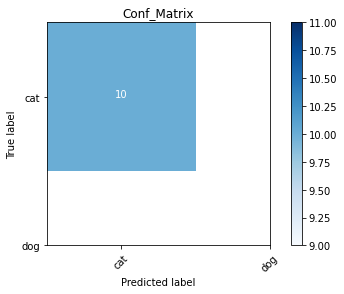

In [60]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Conf_Matrix')

CM only showing cats as in the first test batch of 10 only cats apppeared